In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

In [3]:
# Define the image paths and text prompts
image_paths = [
    r"..\dataset\landscape1\Validation Data\Mountain\Mountain-Valid (16).jpeg",
    r"..\dataset\Water Bodies Dataset\Images\water_body_656.jpg"
]
text_prompts = ["A photo of a mountain", "A picture of a water body", "A beautiful landscape"]

In [4]:
# Tokenize the text prompts
text_tokens = clip.tokenize(text_prompts).to(device)

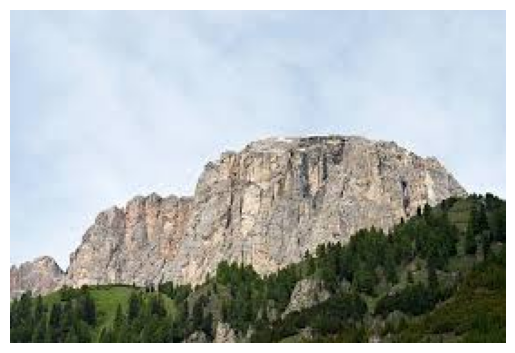

Similarity to 'A photo of a mountain': 99.22%
Similarity to 'A picture of a water body': 0.03%
Similarity to 'A beautiful landscape': 0.76%


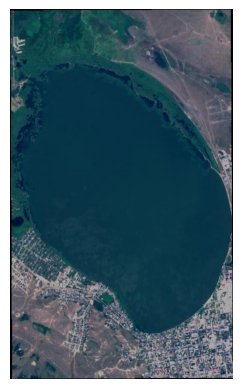

Similarity to 'A photo of a mountain': 0.15%
Similarity to 'A picture of a water body': 99.61%
Similarity to 'A beautiful landscape': 0.22%


In [5]:
# Forward pass for each image
for image_path in image_paths:
    # Load and preprocess the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Forward pass to get image and text features
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

    # Normalize features to compare cosine similarity
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Compute similarity between the image and text prompts
    similarities = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    # Print the results for each text prompt
    # print(f"Results for image: {image_path}")
    for i, prompt in enumerate(text_prompts):
        print(f"Similarity to '{prompt}': {similarities[0][i].item() * 100:.2f}%")